# DBSCAN cluster analysis

In [ ]:
import cuml
import cudf
import os
import time

In [3]:
import torch
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
output_dir='/rapids/notebooks/host/representations/output/'

In [38]:
df = torch.load(os.path.join(output_dir,'dask_dbscan_865_10_label_df.bin'))

In [40]:
cluster_count = df['cluster'].value_counts()

In [41]:
cluster_count.head()

 0      530375
-1       30088
 1           8
 314         5
 722         4
Name: cluster, dtype: int64

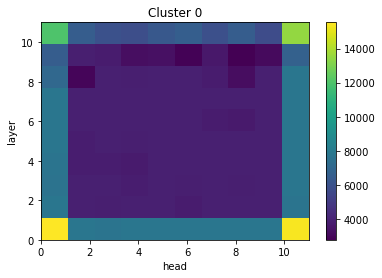

In [49]:
c = 0
df_c = df[df['cluster'] == c]
h = plt.hist2d(df_c['head'],df_c['layer'])
plt.title(f"Cluster {c}")
plt.xlabel("head")
plt.ylabel("layer");
plt.colorbar(h[3])

In [44]:
top_clusters = cluster_count.index.to_list()

In [45]:
top_clusters[0:9]

[0, -1, 1, 314, 722, 713, 266, 384, 182]

In [58]:
df_clusters = {}
for c in top_clusters[0:100]:
    df_clusters[c] = df[df['cluster'] == c]

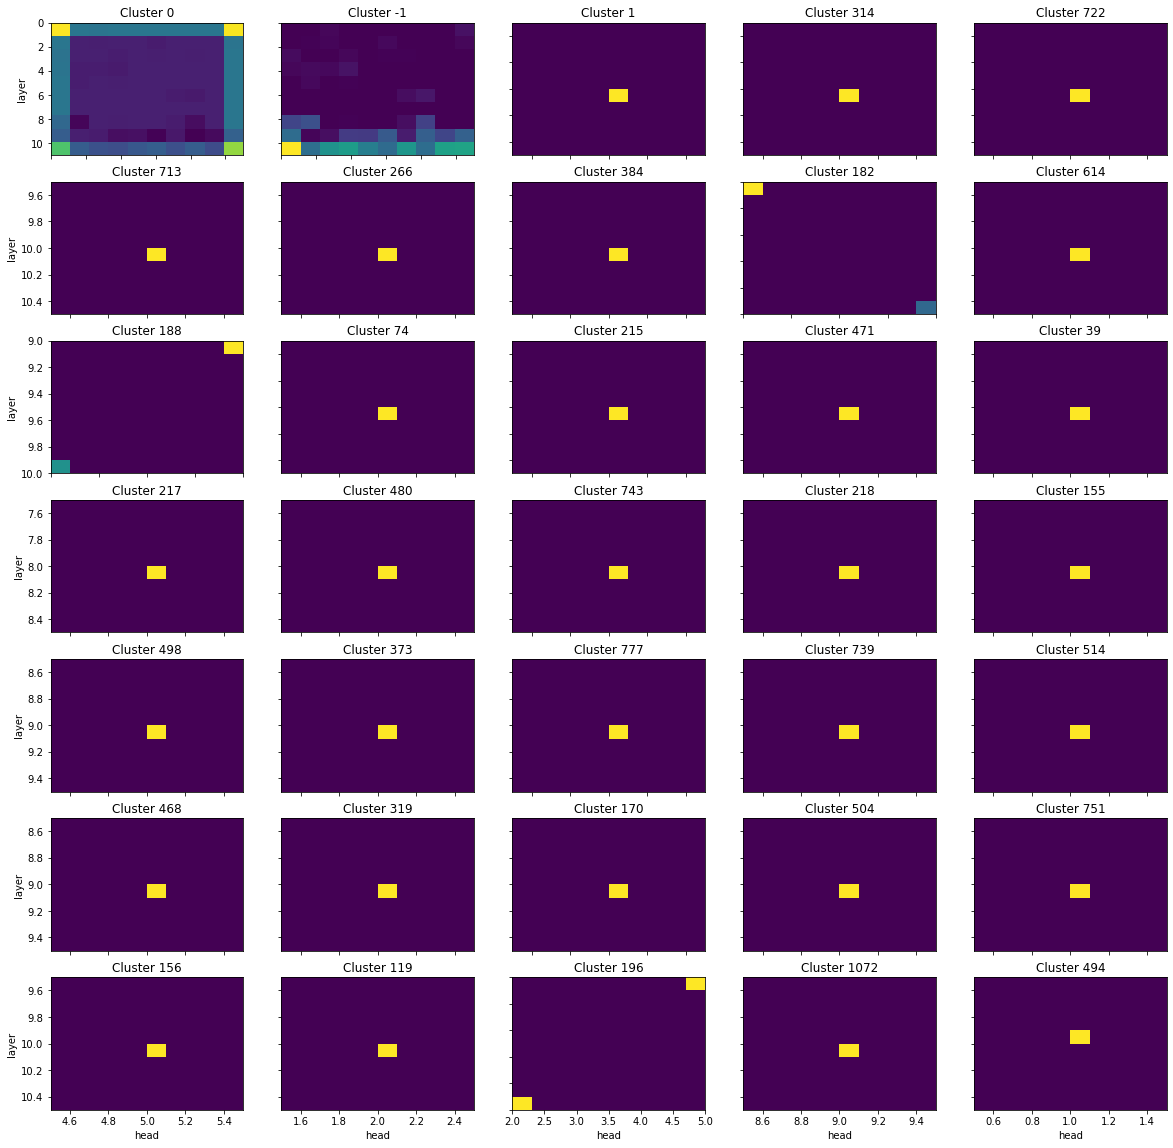

In [68]:

fig, axis = plt.subplots(7, 5, figsize=(20,20))

for i, axs in zip(top_clusters[0:36], axis.flat):
    im = axs.hist2d(df_clusters[i]['head'],df_clusters[i]['layer'])
    axs.set_title(f'Cluster {i}')
    axs.set(xlabel='head', ylabel='layer')
    axs.label_outer()
    axs.set_ylim(axs.get_ylim()[::-1])

plt.gca().invert_yaxis()

In [74]:
df = torch.load(os.path.join(output_dir,'dask_dbscan_87_10_label_df.bin'))

In [78]:
cluster_count = df['cluster'].value_counts()
top_clusters = cluster_count.index.to_list()
len(top_clusters)

18

In [79]:
df_clusters = {}
for c in top_clusters:
    df_clusters[c] = df[df['cluster'] == c]

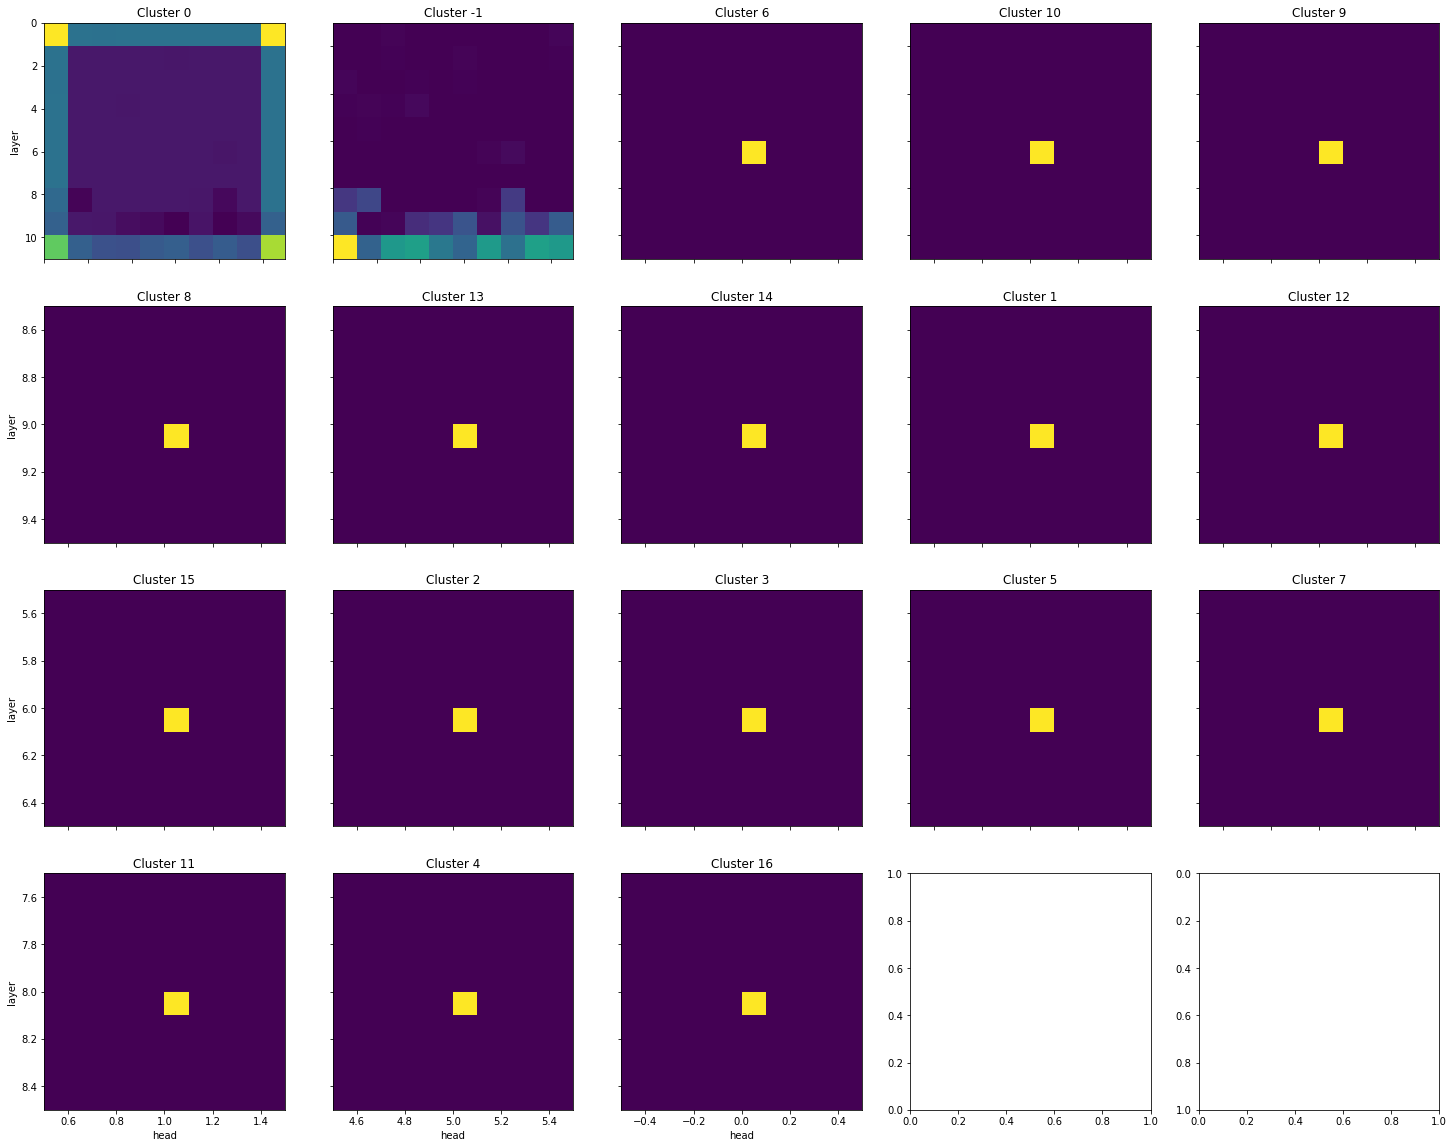

In [83]:
fig, axis = plt.subplots(4, 5, figsize=(25,20))

for i, axs in zip(top_clusters[0:36], axis.flat):
    im = axs.hist2d(df_clusters[i]['head'],df_clusters[i]['layer'])
    axs.set_title(f'Cluster {i}')
    axs.set(xlabel='head', ylabel='layer')
    axs.label_outer()
    axs.set_ylim(axs.get_ylim()[::-1])

plt.gca().invert_yaxis()